# Starter code to handle stringer data

https://github.com/MouseLand/stringer-pachitariu-et-al-2018a

dataset info

* probe location in brain information
* borders tells you region based on depth
* ccfCoords tells you position in microns relative to allen CCF

---

* possible brain regions (as strings)
areaLabels = 'FrCtx','FrMoCtx','SomMoCtx','SSCtx','V1','V2','RSP','CP','LS','LH','HPF','TH','SC','MB';

---

* st = spike times (in seconds)

* clu = cluster identity of each spike in st (which neuron does spike belong to)

* Wh = height of each cluster on the probe

---

* face_proc.mat movie of mouse face during recording was dimensionality reduced using SVD

  * motionSVD = timepoints x components
  * motionMask = pixels x pixels x components
  * times = times of behavioral frames (in seconds) in same timeframe as spikes

In [ ]:
from scipy import io
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!unzip -jn "/content/drive/My Drive/7739750.zip"
!unzip -jn "/content/faces.zip"
!unzip -jn "/content/spks.zip"

Archive:  /content/drive/My Drive/7739750.zip
 extracting: faces.zip               
 extracting: spks.zip                
 extracting: ephysLoad.m             
 extracting: probeLocations.mat      
 extracting: probeBorders.mat        
Archive:  /content/faces.zip
  inflating: Robbins_face_proc.mat   
  inflating: Krebs_face_proc.mat     
  inflating: Waksman_face_proc.mat   
Archive:  /content/spks.zip
  inflating: spksWaksman_Feb18.mat   
  inflating: spksRobbins_Feb18.mat   
  inflating: spksKrebs_Feb18.mat     


# load the probe locations, probe borders, face maps, and spikes 

In [ ]:
probeLoc = io.loadmat('probeLocations.mat')
probeBorders = io.loadmat('probeBorders.mat', squeeze_me=True)

mouse_names = ['Krebs','Waksman','Robbins']
# start of spontaneous activity in each mouse (in seconds)
tstart = [3811, 3633, 3323];

imouse = 0

spks = io.loadmat('/content/spks%s_Feb18.mat'%mouse_names[imouse], squeeze_me=True)
faces = io.loadmat('/content/%s_face_proc.mat'%mouse_names[imouse], squeeze_me=True)

In [ ]:
faces.keys()

dict_keys(['__header__', '__version__', '__globals__', 'nY', 'nX', 'motionSVD', 'avgframe', 'avgmotion', 'motionMask', 'times'])

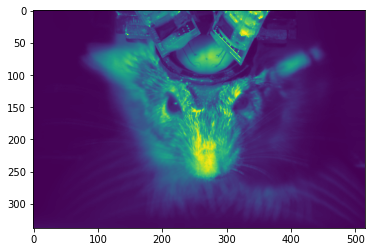

In [ ]:
plt.imshow(faces["avgframe"])
plt.show()

In [ ]:

# probe k
k = 0
# spike times (in seconds)
st = spks['spks'][k][0]
# clusters
clu = spks['spks'][k][1]
# cluster heights (in microns)
# (see siteCoords to convert to site location)
Wh = spks['spks'][k][2]

# processed faces
motSVD = faces['motionSVD']
video_timestamps = faces['times']

# where is the probe in the brain (consolidated labels)
# borders are in microns
# use Wh to determine which clusters are in which brain region
borders = probeBorders['probeBorders'][imouse]['borders'][k]
for j in range(len(borders)):
   b = borders[j]
   print('upper border %d, lower border %d, area %s'%(b[0],b[1],b[2]))
   wneurons = np.logical_and(Wh>=b[1], Wh<b[0])
   nn = wneurons.sum()
   print('%d neurons in %s'%(nn,b[-1]))
   
# where is the probe in the brain (in microns)
ccfCoords = probeLoc['probeLocations'][0][imouse]['probe'][k][0]['ccfCoords']
# name of area in Allen ontology by site on electrode
ccfNames = probeLoc['probeLocations'][0][imouse]['probe'][k][0]['ccfOntology']
# coordinates of each site on the electrode
siteCoords = probeLoc['probeLocations'][0][imouse]['probe'][k][0]['siteCoords']

upper border 4000, lower border 1100, area FrMoCtx
5 neurons in FrMoCtx
upper border 1100, lower border 0, area LS
122 neurons in LS
